# Dictionaries and Sets
## Step 12

I will use the marco geoestadístico 2010 from (https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825292812) and 2020 (https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463807469) to obtain the "Áreas Geoestadísticas Básicas" (AGEBs) from Mérida, Yucatán and how they evolve on time using sets. To visualize the case, I will also make maps.

In [1]:
from dics_and_sets_func import *

First, I will read the data from the marco geoestadístico of 2010 using the `read_shp` function. This function loads a shapefile into a GeoDataFrame using GeoPandas, then filters the GeoDataFrame to include only those entries that belong to Mérida, identified by the 'CVEGEO' field starting with '310500001'.

In [2]:
# Path to the shapefile
shapefile_path_2010 = 'CA3_High Performance Python/Part 3_Dictionaries and Sets/AGEB_2010.shp'
merida_2010 = read_shp(shapefile_path_2010)
merida_2010

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry
53392,LA_6052,310500001516A,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53393,"POLYGON ((3779011.482 1044206.738, 3779006.208..."
53393,LA_6052,3105000012625,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53394,"POLYGON ((3774738.557 1051086.957, 3774742.268..."
53394,LA_6052,3105000012697,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53395,"POLYGON ((3774600.177 1053733.617, 3774614.671..."
53395,LA_6052,3105000013572,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53396,"POLYGON ((3774145.121 1052822.459, 3774195.333..."
53396,LA_6052,3105000015649,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53397,"POLYGON ((3774614.438 1051099.182, 3774607.695..."
...,...,...,...,...,...,...,...,...
53820,LA_6052,3105000015704,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53821,"POLYGON ((3770230.718 1053208.843, 3770238.203..."
53821,LA_6052,3105000015687,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53822,"POLYGON ((3769825.455 1054338.189, 3769975.220..."
53822,LA_6052,3105000015780,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53823,"POLYGON ((3770494.255 1052609.875, 3770422.449..."
53823,LA_6052,3105000015672,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53824,"POLYGON ((3769825.455 1054338.189, 3769800.814..."


Now, I'll plot the Áreas Geoestadísticas Básicas of 2010 using the `plot_gdf` function, which works by checking if the 'geometry' column of the GeoDataFrame contains Shapely geometry objects. If the geometries are already in the correct format, it plots them directly. If not, it attempts to convert them into Shapely geometry objects using WKT (Well-Known Text) before plotting.

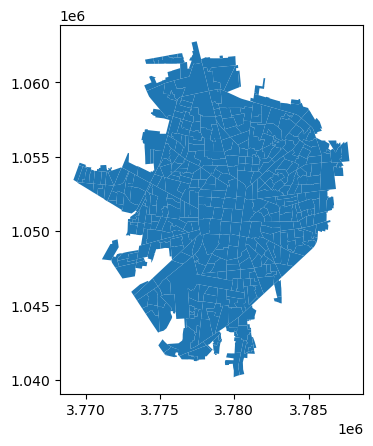

In [3]:
plot_gdf(merida_2010)

Then, I'll do the same with the data from 2020.

In [4]:
# Path to the shapefile
shapefile_path_2020 = 'CA3_High Performance Python/Part 3_Dictionaries and Sets/AGEB_2020.shp'
merida_2020 = read_shp(shapefile_path_2020)
merida_2020

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
412,3105000015329,31,050,0001,5329,"POLYGON ((3779478.623 1047307.492, 3779480.973..."
413,3105000012466,31,050,0001,2466,"POLYGON ((3777875.435 1056949.722, 3777947.632..."
414,310500001249A,31,050,0001,249A,"POLYGON ((3779713.782 1053802.753, 3779711.800..."
415,3105000015827,31,050,0001,5827,"POLYGON ((3772091.762 1052572.146, 3772125.684..."
416,3105000014706,31,050,0001,4706,"POLYGON ((3772829.128 1047931.320, 3772821.774..."
...,...,...,...,...,...,...
933,3105000017039,31,050,0001,7039,"POLYGON ((3775406.523 1040943.870, 3775457.091..."
934,3105000014049,31,050,0001,4049,"POLYGON ((3775740.093 1048924.453, 3775743.166..."
935,3105000010864,31,050,0001,0864,"POLYGON ((3774665.953 1057517.934, 3774639.617..."
936,310500001085A,31,050,0001,085A,"POLYGON ((3772545.613 1046715.097, 3772453.186..."


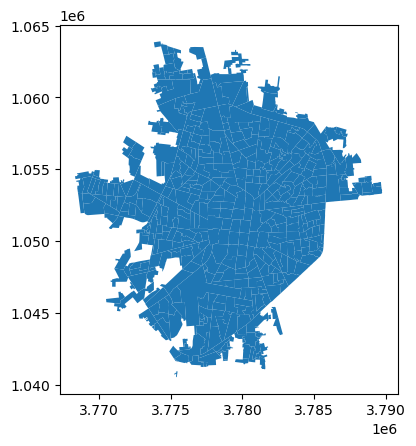

In [5]:
plot_gdf(merida_2020)

### AGEBs which remains from 2010 on 2020
I will identify the AGEBs from the 2010 dataset that still exist in the 2020 dataset by comparing the CVEGEO. To achive this I will compare these identifiers to pinpoint which AGEBs from 2010 are also present in the 2020 dataset. Sets, with their ability to handle unique elements, offer a straightforward way to perform this comparison by finding the intersection of AGEB identifiers between the two years. Once the common AGEBs are identified, I'll use this information to filter and visualize the geographic areas on a map. This will show the AGEBs that have persisted over the decade, offering insights into geographical continuity or change within the specified region.

In [6]:
common_agebs_gdf = remain(merida_2010, merida_2020)
common_agebs_gdf

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry
53392,LA_6052,310500001516A,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53393,"POLYGON ((3779011.482 1044206.738, 3779006.208..."
53393,LA_6052,3105000012625,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53394,"POLYGON ((3774738.557 1051086.957, 3774742.268..."
53394,LA_6052,3105000012697,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53395,"POLYGON ((3774600.177 1053733.617, 3774614.671..."
53395,LA_6052,3105000013572,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53396,"POLYGON ((3774145.121 1052822.459, 3774195.333..."
53396,LA_6052,3105000015649,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53397,"POLYGON ((3774614.438 1051099.182, 3774607.695..."
...,...,...,...,...,...,...,...,...
53820,LA_6052,3105000015704,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53821,"POLYGON ((3770230.718 1053208.843, 3770238.203..."
53821,LA_6052,3105000015687,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53822,"POLYGON ((3769825.455 1054338.189, 3769975.220..."
53822,LA_6052,3105000015780,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53823,"POLYGON ((3770494.255 1052609.875, 3770422.449..."
53823,LA_6052,3105000015672,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53824,"POLYGON ((3769825.455 1054338.189, 3769800.814..."


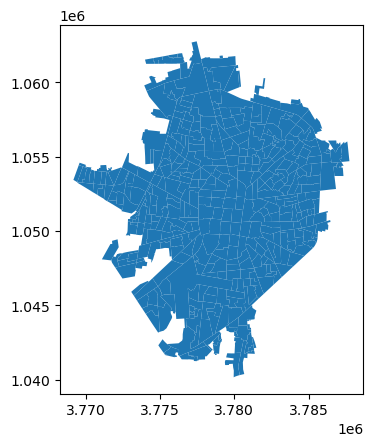

In [7]:
plot_gdf(common_agebs_gdf)

By can be seen comparing the two GeoDataFrames is that 428 AGEBs remmain after 10 years. Now, to have a better understanding of this I'll use the `plot_remaining_agebs`, which plots the AGEBs from 2010 that are still present in 2020. The AGEBs from 2010 and 2020 are displayed as a gray background layer, and the remaining AGEBs common to both 2010 and 2020 are overlaid in purple to see the comparison better.

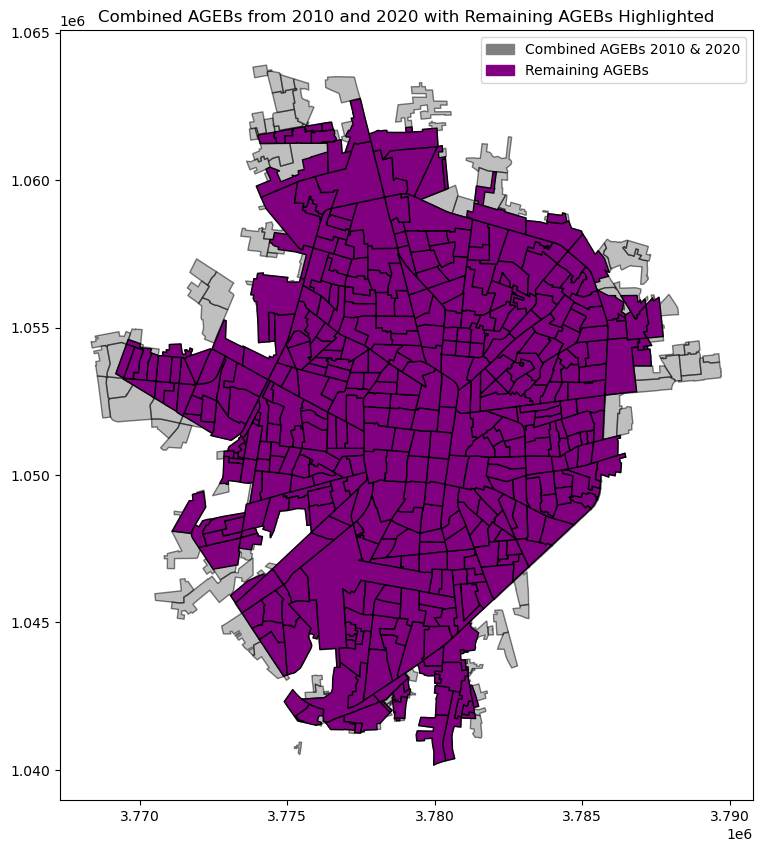

In [8]:
plot_remaining_agebs(merida_2010, merida_2020)

### New AGEBs on 2020
In this case, the goal is to identify new AGEBs that appear in 2020 but were not present in the 2010 by examining their CVEGEO identifiers. This involves comparing the sets of identifiers from both datasets to find those that are unique to the 2020 dataset. After identifying these new AGEBs, the next step is to filter the 2020 dataset to isolate these areas. The final part of the task involves visualizing these new AGEBs on a map.

In [9]:
new_agebs_gdf = new(merida_2010, merida_2020)
new_agebs_gdf

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
425,3105000016736,31,050,0001,6736,"POLYGON ((3777274.452 1063497.752, 3777372.360..."
524,3105000016755,31,050,0001,6755,"POLYGON ((3787351.063 1053697.974, 3787395.282..."
652,3105000016825,31,050,0001,6825,"POLYGON ((3770495.559 1052614.135, 3770487.635..."
789,3105000016632,31,050,0001,6632,"POLYGON ((3775541.926 1061915.979, 3775528.906..."
790,3105000016666,31,050,0001,6666,"POLYGON ((3770027.192 1054443.098, 3770002.280..."
791,3105000016721,31,050,0001,6721,"POLYGON ((3789006.688 1053969.100, 3788995.265..."
792,310500001683A,31,050,0001,683A,"POLYGON ((3770803.384 1052427.195, 3770832.783..."
805,3105000016647,31,050,0001,6647,"POLYGON ((3775241.362 1062401.522, 3775053.082..."
807,310500001690A,31,050,0001,690A,"POLYGON ((3775231.970 1063435.081, 3775216.079..."
808,3105000016948,31,050,0001,6948,"POLYGON ((3782466.293 1060246.041, 3782257.180..."


In [10]:
len(new_agebs_gdf)

55

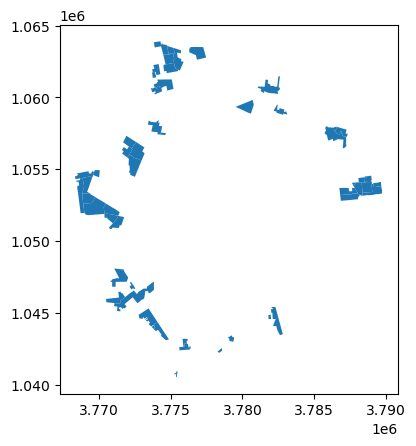

In [11]:
plot_gdf(new_agebs_gdf)

After analyzing the dataset with `len(new_agebs_gdf)`, it can be seen that after 10 years, 55 areas where added. Now, I'll use the `plot_new_agebs` to visualize the new AGEBs. The AGEBs from 2010 are displayed as a gray background layer, and the new AGEBs introduced in 2020 are overlaid in red.

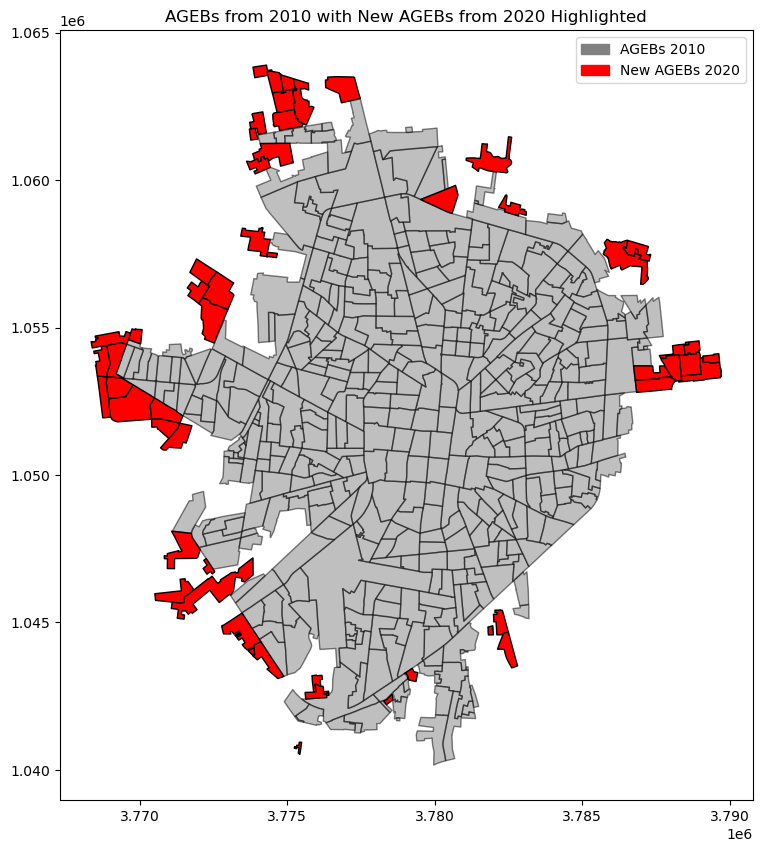

In [12]:
plot_new_agebs(merida_2010, merida_2020)

This visualization highlights the geographic locations of the new AGEBs, and also provides insight into the spatial development and changes in Merida over the decade.

### AGEBs that dissapear from 2010 to 2020
In this section, the objective is to identify AGEBs that were present in the 2010 dataset but are no longer found in the 2020 dataset, indicating these areas have disappeared or been redefined over the decade. This is achieved by comparing the unique CVEGEO identifiers in both datasets. Using sets to represent these identifiers from each year, the operation to find the difference will pinpoint those AGEBs that existed in 2010 but do not have a corresponding entry in the 2020 dataset. This subset represents the disappeared AGEBs. The process involves creating a filtered dataset from the 2010 data that includes only these disappeared AGEBs.

In [13]:
disappeared_agebs_gdf = dissapear(merida_2010, merida_2020)
disappeared_agebs_gdf

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry
53419,LA_6052,3105000012752,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53420,"POLYGON ((3786348.565 1052307.955, 3786352.052..."
53420,LA_6052,3105000012767,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53421,"POLYGON ((3786173.535 1051314.772, 3786174.142..."
53464,LA_6052,3105000013835,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53465,"POLYGON ((3782889.085 1045565.743, 3782899.339..."
53503,LA_6052,3105000013534,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53504,"POLYGON ((3783187.016 1045611.529, 3783123.284..."
53611,LA_6052,3105000015507,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53612,"POLYGON ((3781340.505 1059223.595, 3781358.477..."


In [14]:
len(disappeared_agebs_gdf)

5

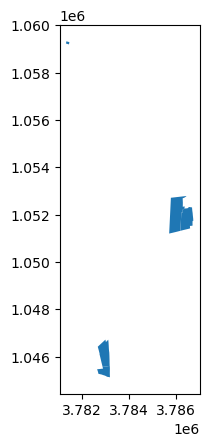

In [15]:
plot_gdf(disappeared_agebs_gdf)

After ten years, only 5 areas dissapeared or changed. I'll show the comparison using `plot_disappeared_agebs` to see the change better. This function plots the AGEBs from 2010 that disappeared by 2020. The AGEBs from 2020 are displayed as a gray background layer, and the AGEBs that disappeared by 2020 are overlaid in blue.

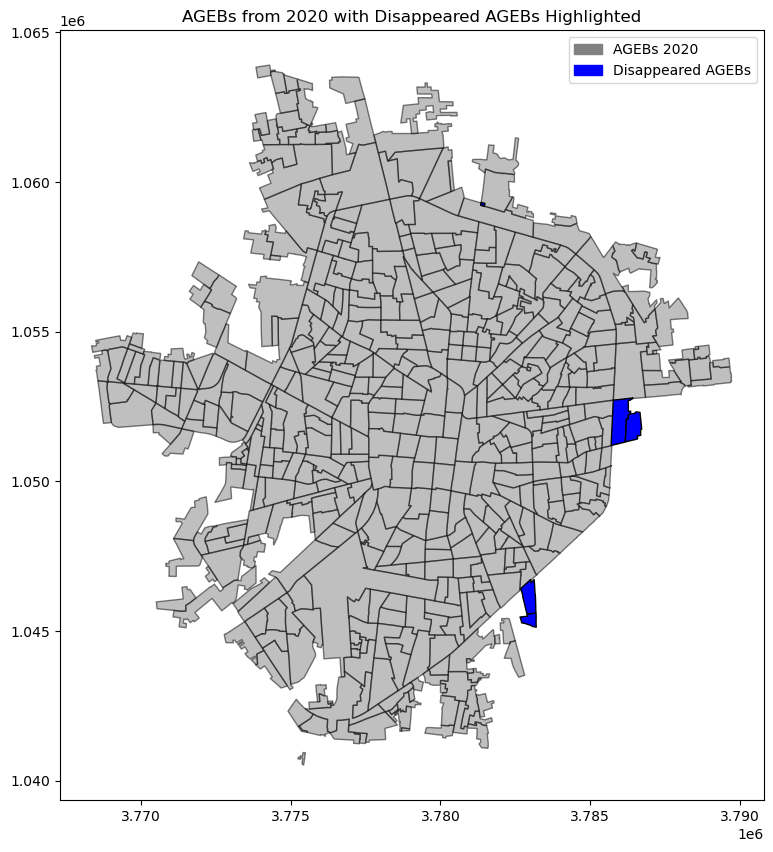

In [16]:
plot_disappeared_agebs(merida_2010, merida_2020)

The visual let's us observe geographical changes and urban development patterns between 2010 and 2020, highlighting areas that may have undergone significant transformation or no longer exist as they once did.

Now, I will use another function to visualize better and more clearly the change over ten years. This function is `comparison_plot` that plots and compares the AGEBs from 2010 and 2020 GeoDataFrames on the same map for visual comparison. The function plots the 2010 AGEBs in blue and the 2020 AGEBs in red. Areas where AGEBs overlap will appear in a blended color, indicating no change. Areas in red or blue only indicate AGEBs that are new in 2020 or were only present in 2010, respectively.

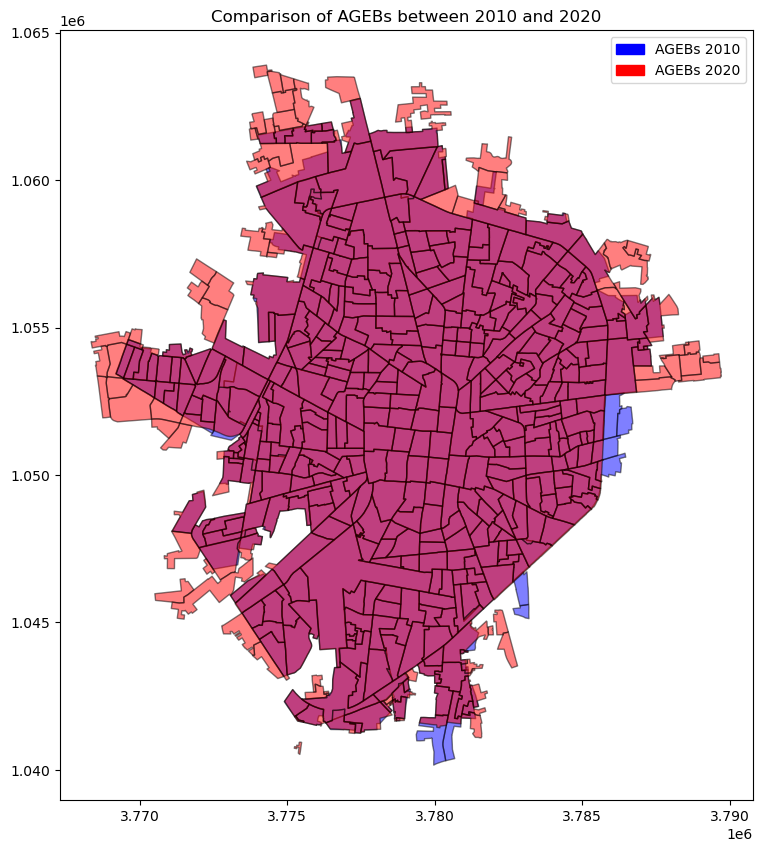

In [17]:
comparison_plot(merida_2010, merida_2020)

### Conclusion
In this activity, the evolution of "Áreas Geoestadísticas Básicas" (AGEBs) in Mérida, Yucatán from 2010 to 2020 was explored using the marco geoestadístico datasets. Key to our analysis were sets and dictionaries, which facilitated efficient comparison of 'CVEGEO' identifiers to identify persistent, new, and disappeared AGEBs. Sets allowed for straightforward identification of common and unique identifiers through set operations, simplifying the data handling process. The visualization of AGEB changes provided clear insights into geographical continuity and changes over the decade, aiding in the understanding of urban development patterns.